<a href="https://colab.research.google.com/github/Said261/Exemplos-de-Programas-em-Python/blob/main/Projeto_Ci%C3%AAncia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsão de Preços**

### O desafio é conseguir prever o preço venda de um produto baseado em suas características.

Em particular, os produtos de interesse são **Barcos**, e as características consideradas nesse exemplo são:
- Ano
- Material
- Novo ou Usado
- tamanho
- tipo

A base de dados está disponível no seguinte link: https://drive.google.com/drive/folders/1lj4UC3l_Q-KolcD5oYl7nY_UDPAbEnHh?usp=sharing

### **Tabelas de Características**

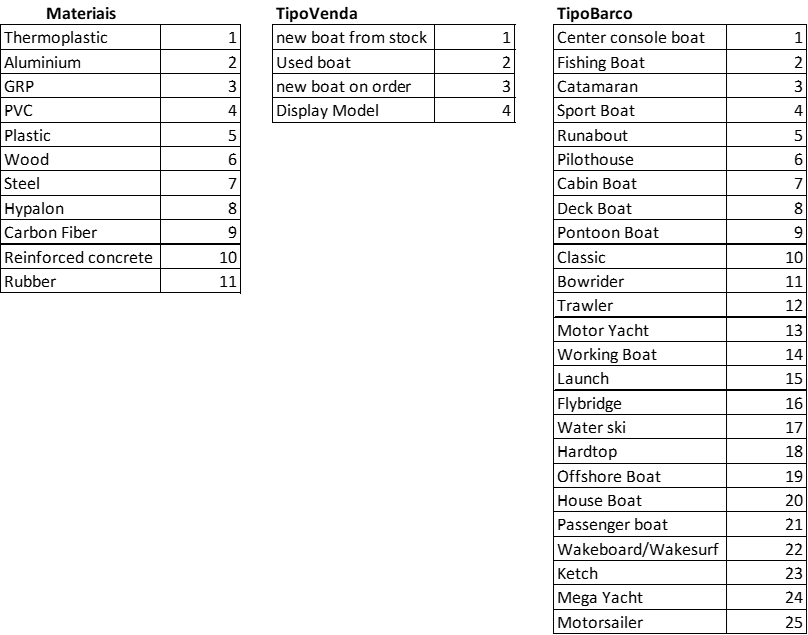

## **Nota**:
### Para conseguir abordar o presente problema, precisamos considerar que o **preço** que vamos prever, debe ser determinado por um modelo com alto grão de precisão. Isto é, determinar um valor razonavelmente bom, que consiga garantir o maior ganho possível para uma tipo de empresa que se desenvolve em um mercado de poca **demanda**. Ou seja, que nossa previsão tem que permitir estabelecer um **preço competitivo**, que seja consistente com o histórico de dados da empresa para as características consideradas.

### Importamos as **librarias** necessárias para atingir nosso objetivo:

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Vamos ler a nossa base de dados e mostrar os primeiros elementos

In [48]:
tabela = pd.read_csv('/content/barcos_ref.csv')
tabela.head()

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3


### É fundamental dar uma olhada na informação de nossos dados para entender se existem valores nulos, ou fora do padrão, entre outros.

In [50]:
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preco        7649 non-null   int64  
 1   TipoBarco    7649 non-null   int64  
 2   TipoVenda    7649 non-null   int64  
 3   Ano          7649 non-null   int64  
 4   Comprimento  7649 non-null   float64
 5   Largura      7649 non-null   float64
 6   Material     7649 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 418.4 KB
None


### Apresentemos a correlação que existe entre as variáveis:

In [51]:
tabela.corr()[['Preco']]

,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


### **Observação:** os dados aresentados, mostram que as variáveis que maior correlação com o preço são em primeiro lugar suas dimensões o comprimento e a largura, em segundo lugar o tipo, em tercer lugar o ano. Por outro lado, vemos que o material apresenta una correlação negativa.

### Uma representação gráfica da correlação entre as varáveis pode ser observada abaixo:

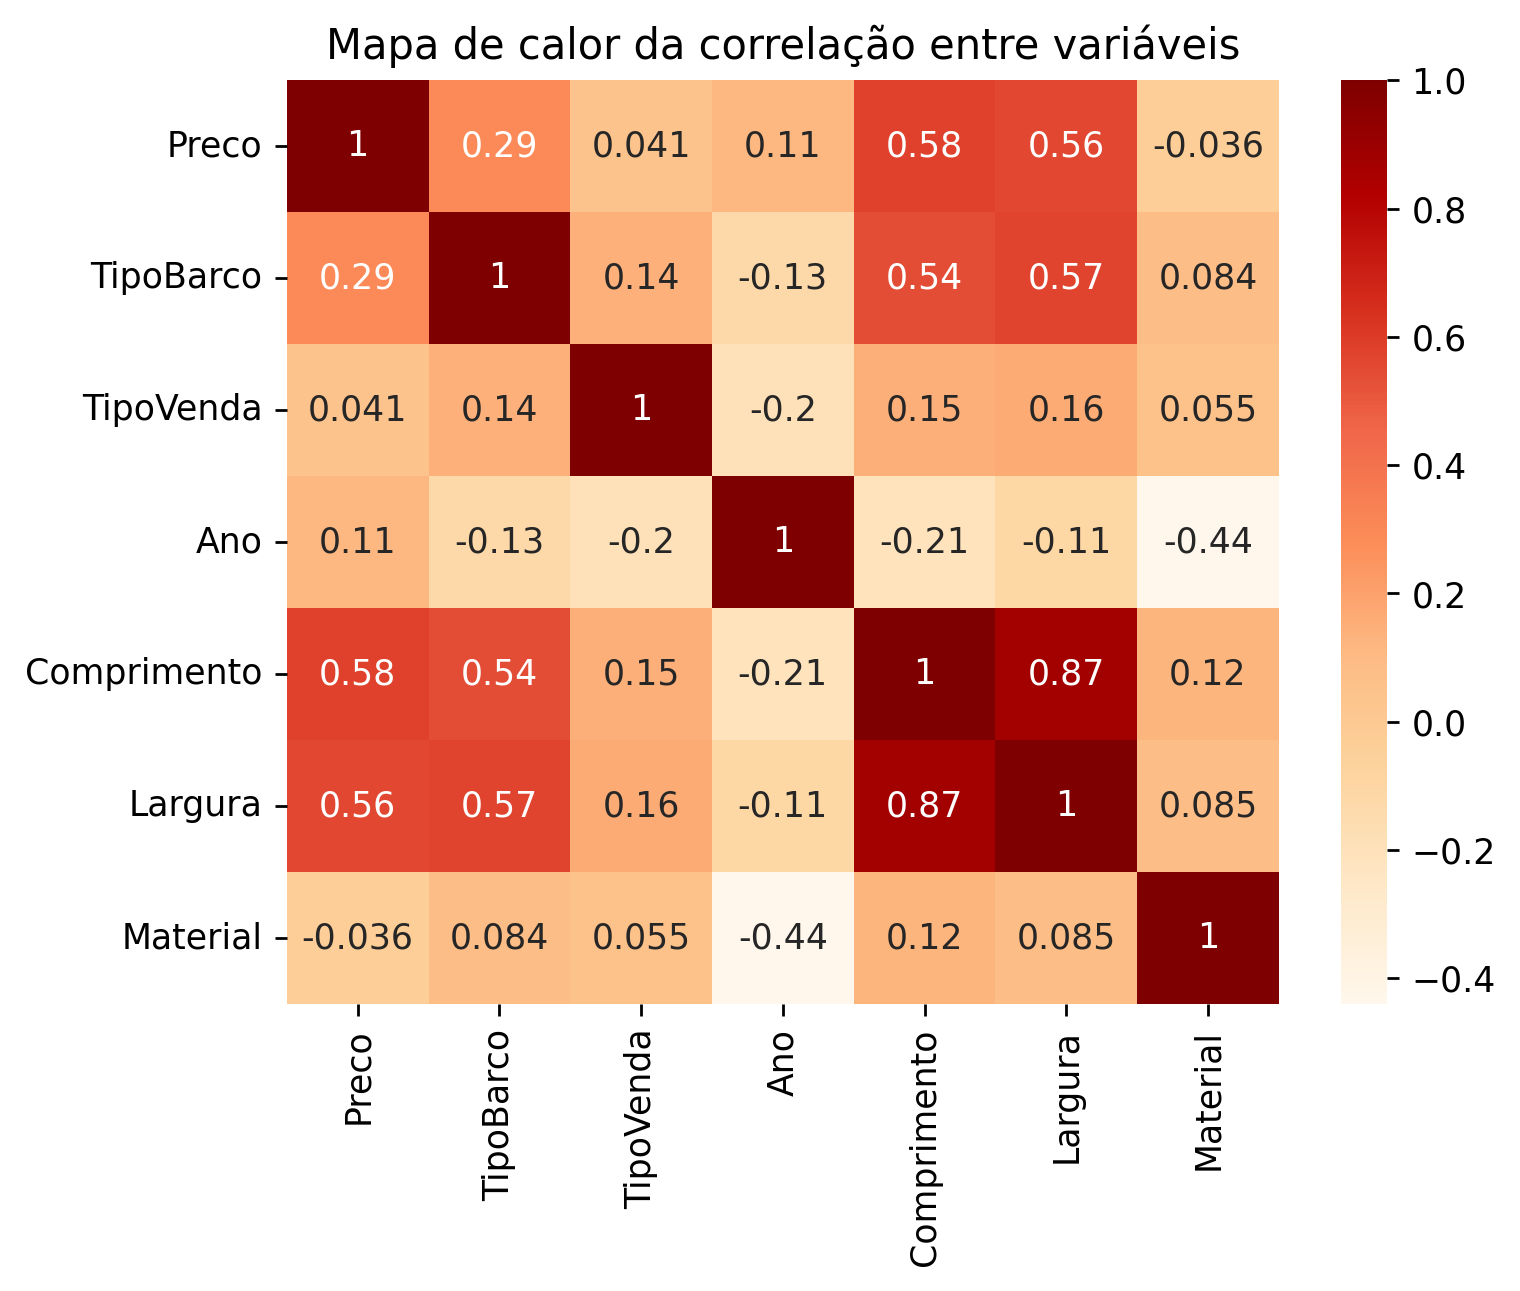

In [54]:
f, ax = plt.subplots(dpi=250)
sns.heatmap(tabela.corr(), annot=True, cmap='OrRd')
plt.title('Mapa de calor da correlação entre variáveis')
plt.show()

### Fazemos a preparação dos dados separando a nossa coluna de interesse (coluna de valores a serem previstos), com relação às caraterísticas

In [55]:
X = tabela.drop('Preco', axis=1)
y = tabela['Preco']

### Fazemos a preparação dos dados para treinar e os dados de teste para cada uma de nossas variáveis

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

### Damos uma olhada nas dimensões dos dados

In [57]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5354, 6), (2295, 6), (5354,), (2295,))

### Instanciamos as classes

In [58]:
lr_model = LinearRegression()
rfr_model = RandomForestRegressor()

### Treinamos o nosso modelo e geramos a previsão

In [59]:
lr_model.fit(X_train,y_train)
lr_predict = lr_model.predict(X_test)

rfr_model.fit(X_train,y_train)
rfr_predict = rfr_model.predict(X_test)

### Vamos ver qual de modelo é mais confiável

In [74]:
print(f'O Coeficiente de determinação para o modelo de Regressão Linear é: {np.format_float_positional(r2_score(y_test, lr_predict),precision=2)}')
print(f'O Coeficiente de determinação para o modelo de Arvore de Decisão é: {np.format_float_positional(r2_score(y_test, rfr_predict),precision=2)}')

O Coeficiente de determinação para o modelo de Regressão Linear é: 0.48
O Coeficiente de determinação para o modelo de Arvore de Decisão é: 0.87


###  Calculando o **Coeficiente de determinação** ($0 \leq R^{2} \leq 1$) podemos ver quanto nosso modelo explica os dados melhor que a média. Em nosso caso, vemos que o modelo **"rfr_model"** está mais perto da unidade e por tanto é mais confiável.

### A representação gráfica da dispersão da variável teste com relação ao modelo pode ser observada nas figuras de abaixo

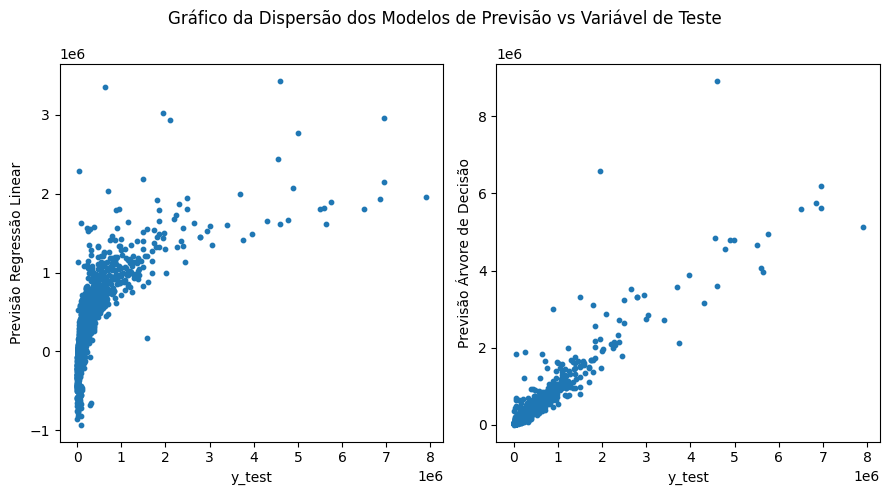

In [102]:
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(9,5), tight_layout=True, dpi=100)
f.suptitle('Gráfico da Dispersão dos Modelos de Previsão vs Variável de Teste')
ax1.scatter(y_test,lr_predict,s=10)
ax2.scatter(y_test,rfr_predict,s=10)
ax1.set_xlabel('y_test')
ax1.set_ylabel('Previsão Regressão Linear')
ax2.set_xlabel('y_test')
ax2.set_ylabel('Previsão Árvore de Decisão')
plt.show()


### Outro gráfico de interesse é obtido a partir de uma tabela auxiliar

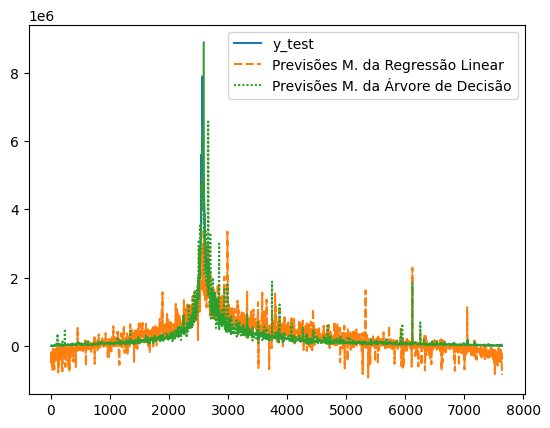

In [106]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_test'] = y_test
tabela_auxiliar['Previsões M. da Regressão Linear'] = lr_predict
tabela_auxiliar['Previsões M. da Árvore de Decisão'] = rfr_predict

sns.lineplot(data=tabela_auxiliar)
plt.show()

### É claro que o modelo da Árvore de Decisão (**curva verde**) consegui prever valores que acompanham melhor o comportamento do preço.

### Para gerar uma previsão de preço para um conjunto de barcos em particular importamos a seguinte tabela

In [108]:
tabela_novos = pd.read_csv('/content/novos_barcos.csv')
tabela_novos

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


### E finalmente aplicando nosso modelo sobre a tabela nova para obter os valores:

In [111]:
previssao_preco = rfr_model.predict(tabela_novos)
print(f'O valor previsto para o Barco de tipo 2 de 3.0 m x 1.5 m é de R$ {np.format_float_positional(previssao_preco[0],precision=2)}')
print(f'O valor previsto para o Barco de tipo 2 de 3.8 m x 1.9 m é de R$ {np.format_float_positional(previssao_preco[1],precision=2)}')
print(f'O valor previsto para o Barco de tipo 3 de 6.2 m x 3.0 m é de R$ {np.format_float_positional(previssao_preco[2],precision=2)}')

O valor previsto para o Barco de tipo 2 de 3.0 m x 1.5 m é de R$ 7834.58
O valor previsto para o Barco de tipo 2 de 3.8 m x 1.9 m é de R$ 11102.33
O valor previsto para o Barco de tipo 3 de 6.2 m x 3.0 m é de R$ 16402.8
